In [83]:
import pathlib
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

ImportError: No module named cv2

In [16]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[0]
im = imageio.imread(str(im_path))

In [18]:
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
from skimage.color import rgb2gray
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

Original image shape: (256, 256, 4)
New image shape: (256, 256)


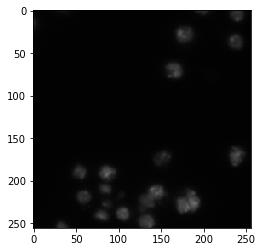

In [24]:
plt.imshow(im)

In [54]:
training_paths = pathlib.Path('stage1_train').glob('*')
training_sorted = sorted([x for x in training_paths])

In [55]:
path, dirs, files = os.walk("stage1_train").next()
im_count = len(dirs)

In [45]:
case0 = dirs[0]

In [81]:
nuclei_data = []
for case in dirs:
    p, d, masks = os.walk("stage1_train/"+case+"/masks").next()
    nuclei_count = len(masks)
    #print nuclei_count
    if nuclei_count > 350:
        print case
        outlier_im = imageio.imread("stage1_train/"+case+"/images/"+case+".png")
        
    nuclei_data.append(nuclei_count)
nuclei_data = np.array(nuclei_data)

a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288
0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1


(array([ 142.,  179.,  109.,   56.,   49.,   31.,   21.,   15.,   13.,
          11.,   12.,    8.,    5.,    2.,    2.,    5.,    1.,    0.,
           0.,    1.,    3.,    1.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    2.]),
 array([   1.        ,   13.46666667,   25.93333333,   38.4       ,
          50.86666667,   63.33333333,   75.8       ,   88.26666667,
         100.73333333,  113.2       ,  125.66666667,  138.13333333,
         150.6       ,  163.06666667,  175.53333333,  188.        ,
         200.46666667,  212.93333333,  225.4       ,  237.86666667,
         250.33333333,  262.8       ,  275.26666667,  287.73333333,
         300.2       ,  312.66666667,  325.13333333,  337.6       ,
         350.06666667,  362.53333333,  375.        ]),
 <a list of 30 Patch objects>)

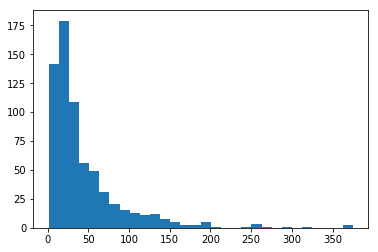

In [92]:
plt.hist(nuclei_data, bins = 30)

In [63]:
from scipy import stats

In [64]:
stats.describe(nuclei_data)

DescribeResult(nobs=670, minmax=(1, 375), mean=43.971641791044775, variance=2300.4042768221675, skewness=2.865307317651728, kurtosis=11.325741184404169)

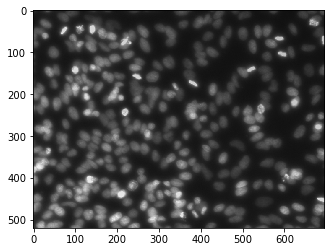

In [82]:
plt.imshow(outlier_im)

In [90]:
stats.kstest(nuclei_data, 'norm')

KstestResult(statistic=0.98820234077433999, pvalue=0.0)